# Customer Spending Dataset

Summary in here.

## Data Preparation and Cleaning

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset.head(10)

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [82]:
dataset[dataset["Age"].isna() | dataset["Age"].isnull()]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score


In [83]:
dataset[dataset["CustomerID"].isna() | dataset["CustomerID"].isnull()]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score


In [84]:
dataset[dataset["Annual_Income_(k$)"].isna() | dataset["Annual_Income_(k$)"].isnull()]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score


In [85]:
dataset[dataset["Spending_Score"].isna() | dataset["Spending_Score"].isnull()]

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score


## Exploratory Data Analysis

In [86]:
dataset_backup = dataset.copy()
dataset.drop("CustomerID", axis=1, inplace=True)


In [87]:
dataset.rename(
    columns={
        "Spending_Score":"spending_score",
        "Annual_Income_(k$)":"annual_income",
        "Age":"age",
        "Genre":"gender"
    },
    inplace=True
)

In [88]:
dataset

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [89]:
dataset.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


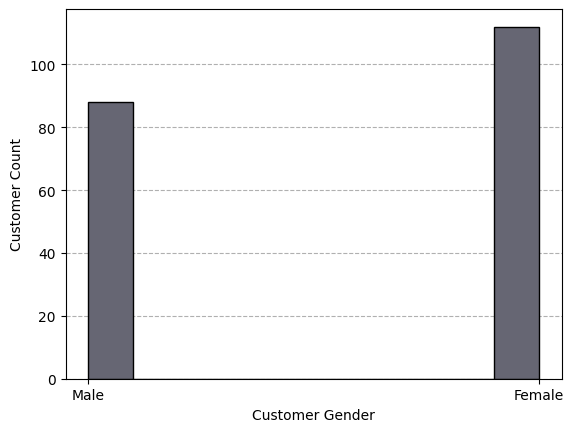

In [90]:
gender = dataset.gender
fig, ax = plt.subplots()
ax.hist(gender, color=(0.4,0.4,0.45), edgecolor="black",zorder=2)
ax.set_xlabel("Customer Gender")
ax.set_ylabel("Customer Count")
ax.yaxis.grid(linestyle='--', zorder=0)
plt.show()

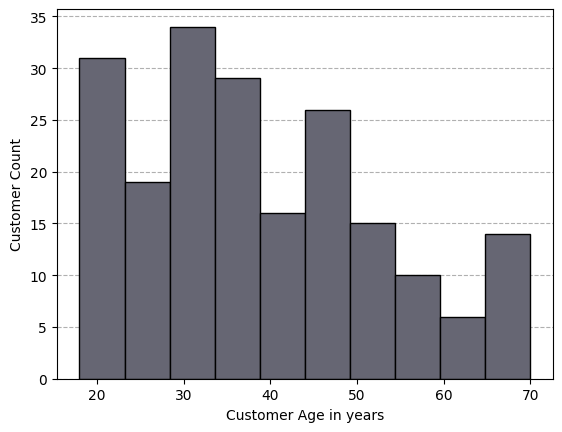

In [91]:
age = dataset.age
fig, ax = plt.subplots()
ax.hist(age, color=(0.4,0.4,0.45), edgecolor="black",zorder=2)
ax.set_xlabel("Customer Age in years")
ax.set_ylabel("Customer Count")
ax.yaxis.grid(linestyle='--', zorder=0)
plt.show()

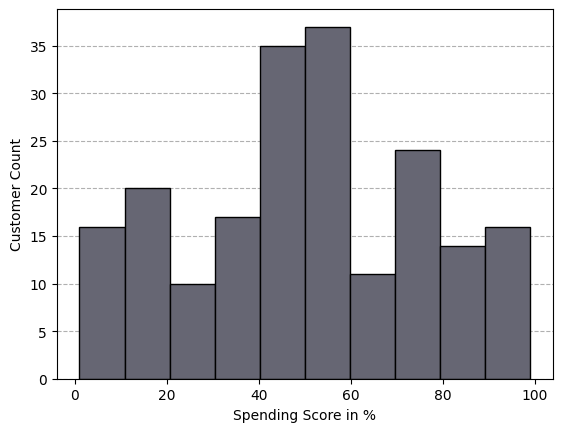

In [92]:
scores = dataset.spending_score
fig, ax = plt.subplots()
ax.hist(scores, color=(0.4,0.4,0.45), edgecolor="black",zorder=2)
ax.set_xlabel("Spending Score in %")
ax.set_ylabel("Customer Count")
ax.yaxis.grid(linestyle='--', zorder=0)
plt.show()

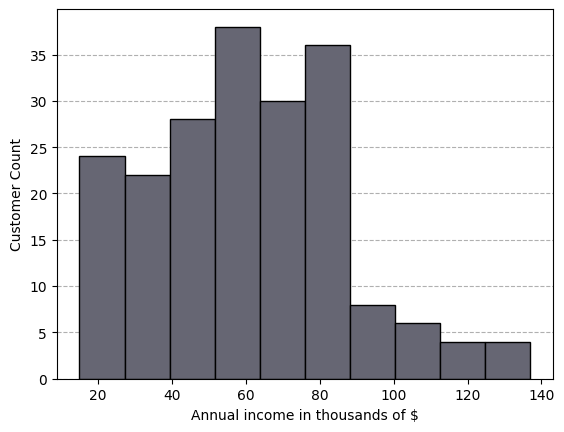

In [93]:
annual_income = dataset.annual_income
fig, ax = plt.subplots()
ax.hist(annual_income, color=(0.4,0.4,0.45), edgecolor="black",zorder=2)
ax.set_xlabel("Annual income in thousands of $")
ax.set_ylabel("Customer Count")
ax.yaxis.grid(linestyle='--', zorder=0)
plt.show()

In [94]:
import seaborn as sns

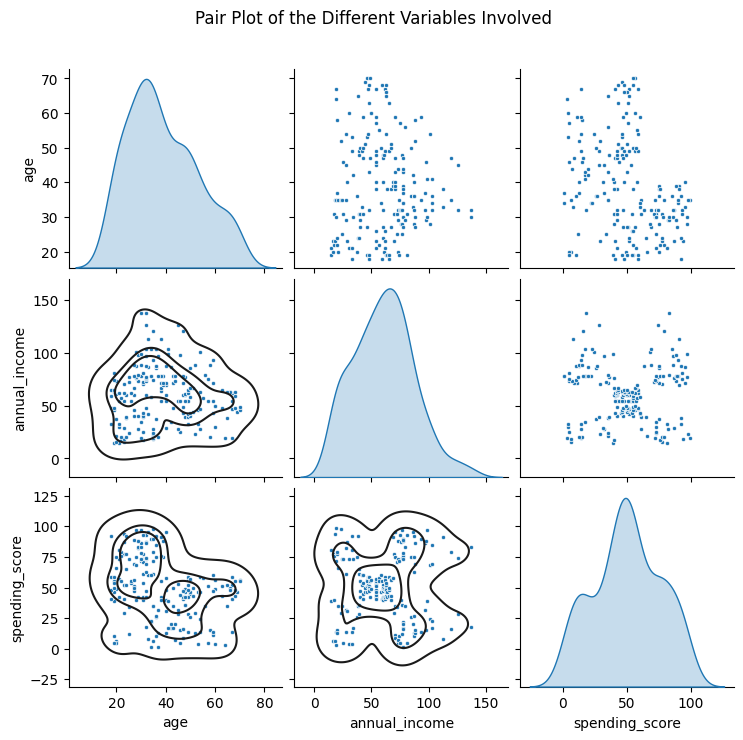

In [95]:
g = sns.pairplot(dataset, plot_kws=dict(marker='.', linewidth=0.5), diag_kind='kde')

# Add Level Curves
g.map_lower(sns.kdeplot, levels=4, color=".1")

# Add title
g.fig.subplots_adjust(top=0.9)
_ = g.fig.suptitle("Pair Plot of the Different Variables Involved")

## Detailed Analysis